# Vader Mean

In [1]:
import pandas as pd
features_and_target = pd.read_csv('data_with_everything.csv')


In [2]:

features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median'],
      dtype='object')

In [3]:
final_score_list=[]
for val in features_and_target['Tw_Vader_mean']:
    if val > 0:
        final_score_list.append(1)
    elif val < 0:
        final_score_list.append(-1)
    else:
        final_score_list.append(0)

print(len(final_score_list))

features_and_target = features_and_target.assign(class_label_Vader_mean=final_score_list)
 

148712


In [4]:
features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median', 'class_label_Vader_mean'],
      dtype='object')

In [5]:

features_and_target_to_use = features_and_target[['Scopus_Subjects','title_Vader','abstract_Vader',\
                                                  'Count_HashTags','Abstract_Length','followers_count','author_count',\
                                                  'class_label_Vader_mean']]

In [6]:
# observing the counts of positive and negative
from collections import Counter
tw_Vader_mean_class_list =features_and_target_to_use['class_label_Vader_mean'].tolist()
a = dict(Counter(tw_Vader_mean_class_list))
print(a)

{-1: 37957, 0: 54922, 1: 55833}


In [7]:
features_and_target_to_use.shape

(148712, 8)

In [8]:
# considering only +1 and -1
features_and_target_to_use_2_labels = features_and_target_to_use[features_and_target_to_use.class_label_Vader_mean != 0]

In [9]:
features_and_target_to_use_2_labels.shape

(93790, 8)

In [10]:
# observing the counts of positive and negative
from collections import Counter
fb_Vader_mean_class_list =features_and_target_to_use_2_labels['class_label_Vader_mean'].tolist()
a = dict(Counter(fb_Vader_mean_class_list))
print(a)

{-1: 37957, 1: 55833}


In [11]:
features_and_target_to_use_2_labels.columns  = ['Scopus Subjects', 'Title Sentiment','Abstract Sentiment', 'Hashtag Count','Abstract Length','Tweet Reach','Author Count','Tweet Sentiment']

In [12]:
features_and_target_to_use_2_labels.columns

Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')

In [13]:
features_and_target_to_use_2_labels

,Scopus Subjects,Title Sentiment,Abstract Sentiment,Hashtag Count,Abstract Length,Tweet Reach,Author Count,Tweet Sentiment
0,Medicine,-0.6597,-0.9758,4,1822,1312,6.0,-1
2,Health Sciences,0.8074,0.9584,0,939,2612,3.0,1
3,Medicine,-0.5106,-0.9648,2,1560,1427,3.0,-1
4,"Biochemistry, Genetics and Molecular Biology",0.0000,0.8422,4,998,3858,11.0,1
5,"Biochemistry, Genetics and Molecular Biology",-0.6597,-0.8363,6,1768,3907,11.0,-1
6,Medicine,0.0000,0.9708,0,580,987,5.0,1
7,Health Sciences,0.0000,0.4019,0,844,777,6.0,1
8,Health Sciences,-0.4215,-0.9866,1,1376,9330,16.0,-1
10,Medicine,-0.2960,0.9186,0,1762,7323,15.0,1
11,"Biochemistry, Genetics and Molecular Biology",0.4019,0.9741,3,973,610,4.0,1


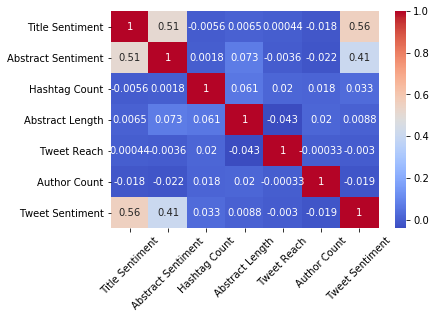

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
corrMatrix = features_and_target_to_use_2_labels.corr()
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [15]:
'''
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Vader_mean')
'''

"\n# Seaborn visualization library\nimport seaborn as sns\n# Create the default pairplot\nsns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Vader_mean')\n"

Standard scaling

In [16]:
print(features_and_target_to_use_2_labels['Scopus Subjects'].unique())

print(len(features_and_target_to_use_2_labels['Scopus Subjects'].unique()))

['Medicine' 'Health Sciences'
 'Biochemistry, Genetics and Molecular Biology' 'Physical Sciences'
 'Life Sciences' 'Dentistry' 'Veterinary' 'Psychology' 'General'
 'Environmental Science' 'Social Sciences'
 'Agricultural and Biological Sciences' 'Materials Science' 'Nursing'
 'Chemical Engineering' 'Health Professions' 'Arts and Humanities'
 'Physics and Astronomy' 'Pharmacology, Toxicology and Pharmaceutics'
 'Mathematics' 'Chemistry' 'Immunology and Microbiology' 'Engineering'
 'Business, Management and Accounting']
24


In [17]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)




# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=4)
DT.fit(X_train, y_train)

# Predicting the Test set results
y_predDT = DT.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predDT)

import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predDT))
print('Precision',sklearn.metrics.precision_score(y_test, y_predDT))
print('Recall',sklearn.metrics.recall_score(y_test, y_predDT))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predDT))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DT, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["gini"], 'max_depth': [1,2,3,14,15], 'min_samples_split': [4,6,8,300,450,600]},
               {'criterion': ["entropy"], 'max_depth': [1,2,13,14,15], 'min_samples_split': [4,6,250,425,450,475,575,600]}]
grid_search = GridSearchCV(estimator = DT,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predDT)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(DT.feature_importances_)
print()

/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


Frequency of unique values of the said array:
[[   -1     1]
 [37957 55833]]
Frequency of unique values of the said array:
[[   -1     1]
 [55833 55833]]
Accuracy 0.8048267215904003
Precision 0.7741935483870968
Recall 0.8628010704727922
F-1 score 0.8160992279458297

confusion matrix
[[8303 2821]
 [1538 9672]]

accuracies mean 0.8069671322080202
accuracies with 2 SD 0.00800285148784424

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  3.2min finished



classification report
              precision    recall  f1-score   support

          -1       0.84      0.75      0.79     11124
           1       0.77      0.86      0.82     11210

    accuracy                           0.80     22334
   macro avg       0.81      0.80      0.80     22334
weighted avg       0.81      0.80      0.80     22334


best accuracy 0.8159562083016164
best parameters
{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 600}

feature importances
Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00752249 0.
 0.         0.         0.         0.         0.         0.
 0.94491042 0.04574662 0.00182047 0.         0.         0.        ]



In [18]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth= 20, min_samples_split=600, n_estimators=60)
RF.fit(X_train, y_train)

# Predicting the Test set results
y_predRF = RF.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRF)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predRF))
print('Precision',sklearn.metrics.precision_score(y_test, y_predRF))
print('Recall',sklearn.metrics.recall_score(y_test, y_predRF))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predRF))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["entropy"], 'max_depth': [10,20,40,60,80,100,120], 'min_samples_split': [20,40,60,80], 'n_estimators':[10,20,30,40], 'bootstrap':[False]}]
grid_search = GridSearchCV(estimator = RF,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predRF)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(RF.feature_importances_)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [37957 55833]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [55833 55833]]
Accuracy 0.821035192979314
Precision 0.7980824861558806
Recall 0.8613737734165924
F-1 score 0.8285211720794544

confusion matrix
[[8681 2443]
 [1554 9656]]

accuracies mean 0.8233105833586023
accuracies with 2 SD 0.008548834014902891

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 49.1min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed: 71.7min finished



classification report
              precision    recall  f1-score   support

          -1       0.85      0.78      0.81     11124
           1       0.80      0.86      0.83     11210

    accuracy                           0.82     22334
   macro avg       0.82      0.82      0.82     22334
weighted avg       0.82      0.82      0.82     22334


best accuracy 0.8258406841893162
best parameters
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 120, 'min_samples_split': 40, 'n_estimators': 30}

feature importances
Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')
[1.42161409e-03 7.82136639e-05 5.13697182e-02 7.53256400e-07
 3.01572166e-04 4.00226228e-05 1.68684604e-04 1.44472411e-07
 8.71806502e-04 3.10981258e-03 2.55585452e-04 1.79502055e-02
 1.29384133e-06 4.83389512e-03 1.88591452e-03 2.42964961e-05
 7.09833985e-02 2.44463377e-04 6.8850

In [19]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


##Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.1, multi_class='ovr', penalty='l1', solver= 'liblinear')
LR.fit(X_train, y_train)
y_predLR = LR.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predLR)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predLR))
print('Precision',sklearn.metrics.precision_score(y_test, y_predLR))
print('Recall',sklearn.metrics.recall_score(y_test, y_predLR))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predLR))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
accuracies.mean()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ["l1"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['liblinear','saga'], 'multi_class':['ovr']},
             {'penalty': ["l2"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['newton-cg','lbfgs','sag'], 'multi_class':['ovr', 'multinomial']}
             ]
grid_search = GridSearchCV(estimator = LR,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predLR)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [37957 55833]]
Frequency of unique values of the said array:
[[   -1     1]
 [55833 55833]]
Accuracy 0.787946628458852
Precision 0.7702905811623246
Recall 0.8229259589652096
F-1 score 0.7957388079013198

confusion matrix
[[8373 2751]
 [1985 9225]]

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  7.6min finished


accuracies mean 0.7883064329068838
accuracies with 2 SD 0.009077992372129265


classification report
              precision    recall  f1-score   support

          -1       0.81      0.75      0.78     11124
           1       0.77      0.82      0.80     11210

    accuracy                           0.79     22334
   macro avg       0.79      0.79      0.79     22334
weighted avg       0.79      0.79      0.79     22334


best accuracy 0.7883513186763982
best parameters
{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}



In [20]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

# Predicting the Test set results
y_predNB = NB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predNB)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predNB))
print('Precision',sklearn.metrics.precision_score(y_test, y_predNB))
print('Recall',sklearn.metrics.recall_score(y_test, y_predNB))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predNB))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predNB)

print()
print('classification report')
print(report)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [37957 55833]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [55833 55833]]
Accuracy 0.5276708157965434
Precision 0.684946838276441
Recall 0.10918822479928635
F-1 score 0.1883511579595291

confusion matrix
[[10561   563]
 [ 9986  1224]]

accuracies mean 0.5345566369146723
accuracies with 2 SD 0.02331117321058542


classification report
              precision    recall  f1-score   support

          -1       0.51      0.95      0.67     11124
           1       0.68      0.11      0.19     11210

    accuracy                           0.53     22334
   macro avg       0.60      0.53      0.43     22334
weighted avg       0.60      0.53      0.43     22334




In [21]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 160, algorithm= 'auto')
KNN.fit(X_train, y_train)

# Predicting the Test set results
y_predKNN = KNN.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predKNN)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predKNN))
print('Precision',sklearn.metrics.precision_score(y_test, y_predKNN))
print('Recall',sklearn.metrics.recall_score(y_test, y_predKNN))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predKNN))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNN, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'n_neighbors': [5,10,20,25,30,40,50,100,120,140,160,180,200,220,240], 'algorithm': ['ball_tree','kd_tree']}]
grid_search = GridSearchCV(estimator = KNN,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predKNN)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [37957 55833]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [55833 55833]]
Accuracy 0.7913942867377093
Precision 0.761016814088772
Recall 0.8519179304192686
F-1 score 0.8039058882949618

confusion matrix
[[8125 2999]
 [1660 9550]]

accuracies mean 0.7897280813899716
accuracies with 2 SD 0.008100752431040357

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 112.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 183.6min finished



classification report
              precision    recall  f1-score   support

          -1       0.83      0.73      0.78     11124
           1       0.76      0.85      0.80     11210

    accuracy                           0.79     22334
   macro avg       0.80      0.79      0.79     22334
weighted avg       0.80      0.79      0.79     22334


best accuracy 0.797698473111539
best parameters
{'algorithm': 'ball_tree', 'n_neighbors': 25}



<Figure size 432x288 with 0 Axes>

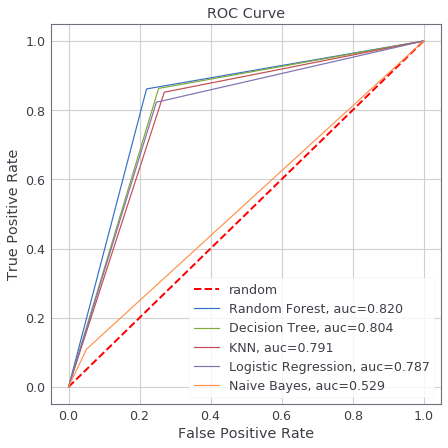

In [22]:
"""PLOTTING"""

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(0).clf()

plt.figure(figsize=(7,7))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='red', linewidth=2, label='random')

#RF
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predRF)
auc = metrics.roc_auc_score(y_test, y_predRF)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc)[:5])

#DT
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predDT)
auc = metrics.roc_auc_score(y_test, y_predDT)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc)[:5])

#KNN
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predKNN)
auc = metrics.roc_auc_score(y_test, y_predKNN)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc)[:5])

#LR
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predLR)
auc = metrics.roc_auc_score(y_test, y_predLR)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc)[:5])

#NB
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predNB)
auc = metrics.roc_auc_score(y_test, y_predNB)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc)[:5])

plt.legend(loc='lower right')

plt.show()